In [152]:
import pandas as pd
import numpy as np
import copy

# import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# custom_params = {"axes.spines.right": False, 'grid.color': 'lightgray', 'axes.grid': True, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)

from survivors import metrics as metr
from survivors import constants as cnt
from survivors import criteria as crit
from survivors import visualize as vis
import survivors.datasets as ds

In [2]:
import survivors.constants as cnt

### Построение непараметрических моделей

In [3]:
X, y, features, categ, sch_nan = ds.load_gbsg_dataset()

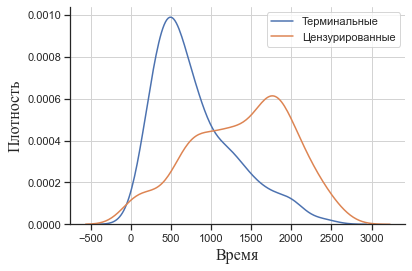

In [4]:
import matplotlib.pyplot as plt

# custom_params = {"axes.spines.right": False, 'grid.color': 'lightgray', 'axes.grid': True, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)

sns.kdeplot(y[y["cens"] == 1]["time"], label="Терминальные")
sns.kdeplot(y[y["cens"] == 0]["time"], label="Цензурированные")
plt.xlabel("Время", fontsize=16, fontname="Times New Roman")
plt.ylabel("Плотность", fontsize=16, fontname="Times New Roman")
plt.legend()

In [4]:
bins = cnt.get_bins(time=y["time"], cens=y["cens"])

[462 515 187 461 218  97 540 538 105 512 152  28 470 472 465 372 186 447
 456 246 431 435 435 434  81 299 137 350 391 405 387 388 359 361 313 359
 225 338 336 328 293 297  98 273 232 563 548  50 481 290 399 434 402  21
  44 196 527 476 477 424 133 427  68 459 432  30  75  23  40  89  95 416
 284  71  22 267 363 110 122 213  24 327  63 307 259 273 248  42  48 211
  80 501 568 566 250 532  91 141 342 494 329 475 320 343 125 396 370 318
 444 423 332 368  72 138 242 215 243 217 181 315  67 153 385 379 452 254
  69 136 443 559 518 282 348  63 126  20 317 428 482 167 316 114 270 441
 159  83 396  36  57 350 111 264 148 321 302  51 192  85 335  63 356 376
 521 160 453 113  54 407 455 268 149 180  49 388 347  18 483 495  70 199
 559 571 559 506 513 497 265 536 236  15 467 443  39 364 436 334 292 341
 154 285 549 555 512 121 263 214  43 498 489  19 272 257 208  66  46 354
 326 185  94 139 145 551 550 124 464 450 120  44 256 366 364 288 180 241
 201 569 209 231 348 561 554 488 286 244 301 325 46

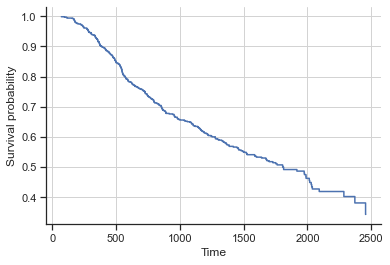

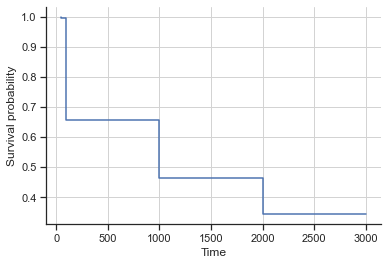

In [6]:
from survivors.external import KaplanMeier

# def plot_surival_function(sf, bins, title=""):
#     plt.step(bins, sf)
#     plt.xlabel('Time')
#     plt.ylabel('Survival probability')
#     plt.title(title)
#     plt.show()

km = KaplanMeier()
km.fit(durations=y["time"], right_censor=y["cens"])
sf_km = km.survival_function_at_times(times=bins)
vis.plot_survival_function(sf_km, bins)

bins_short = [50, 100, 1000, 2000, 3000]
sf_km_short = km.survival_function_at_times(times=bins_short)
vis.plot_survival_function(sf_km_short, bins_short)

In [7]:
bins.shape

(2385,)

In [39]:
np.int32(-1073479624)

-1073479624

In [46]:
{i: 2**i for i in range(25, 35)}

{25: 33554432,
 26: 67108864,
 27: 134217728,
 28: 268435456,
 29: 536870912,
 30: 1073741824,
 31: 2147483648,
 32: 4294967296,
 33: 8589934592,
 34: 17179869184}

In [58]:
-1073479624 >> 24

-64

In [44]:
-1073479624 // 2

-536739812

### Построение индивидуальных прогнозов (деревья выживаемости)

In [188]:
X = pd.read_csv(r"C:\Users\vasiliev\Desktop\PycharmProjects\dev-survivors\survivors\datasets\data\BACKBLAZE\backblaze_drop_truncated_2021_2023.csv")

C:\Users\vasiliev\AppData\Local\Temp\ipykernel_16940\637141287.py:1: DtypeWarning: Columns (180,185) have mixed types. Specify dtype option on import or set low_memory=False.
  X = pd.read_csv(r"C:\Users\vasiliev\Desktop\PycharmProjects\dev-survivors\survivors\datasets\data\BACKBLAZE\backblaze_drop_truncated_2021_2023.csv")


In [192]:
X

date serial_number                 model  capacity_bytes  \
0      2021-02-26  1030A051F97G   TOSHIBA MG07ACA14TA  14000519643136   
1      2021-01-01  1040A003F97G   TOSHIBA MG07ACA14TA  14000519643136   
2      2021-11-11  1040A0C9F97G   TOSHIBA MG07ACA14TA  14000519643136   
3      2021-01-01  1050A098F97G   TOSHIBA MG07ACA14TA  14000519643136   
4      2021-01-08  1050A0C7F9RG  TOSHIBA MG07ACA14TEY  14000519643136   
...           ...           ...                   ...             ...   
42712  2022-03-07      ZTT3VPJV           ST4000DM004   4000787030016   
42713  2022-03-15      ZTT3VQWF           ST4000DM004   4000787030016   
42714  2022-03-15      ZTT3VRN9           ST4000DM004   4000787030016   
42715  2022-02-27      ZTT3VRR2           ST4000DM004   4000787030016   
42716  2023-11-30      ZV70B05W         ST12000NM000J  12000138625024   

       smart_1_normalized  smart_1_raw  smart_2_normalized  smart_2_raw  \
0                   100.0          0.0               100.0          0.0   
1                   100.0          0.0               100.0          0.0   
2                   100.0          0.0               100.0          0.0   
3                   100.0          0.0               100.0          0.0   
4                   100.0          0.0               100.0          0.0   
...                   ...          ...                 ...          ...   
42712               100.0       9054.0                 NaN          NaN   
42713                65.0    2911098.0                 NaN          NaN   
42714               100.0       8928.0                 NaN          NaN   
42715               100.0      11160.0                 NaN          NaN   
42716                 NaN          NaN                 NaN          NaN   

       smart_3_normalized  smart_3_raw  ...  datacenter  cluster_id  \
0                   100.0       7856.0  ...         NaN         NaN   
1                   100.0       7733.0  ...         NaN         NaN   
2                   100.0       7894.0  ...         NaN         NaN   
3                   100.0       7874.0  ...         NaN         NaN   
4                   100.0       5761.0  ...         NaN         NaN   
...                   ...          ...  ...         ...         ...   
42712               100.0          0.0  ...         NaN         NaN   
42713               100.0          0.0  ...         NaN         NaN   
42714               100.0          0.0  ...         NaN         NaN   
42715               100.0          0.0  ...         NaN         NaN   
42716                 NaN          NaN  ...        sac2         0.0   

       pod_slot_num  smart_27_normalized  smart_27_raw  smart_82_normalized  \
0               NaN                  NaN           NaN                  NaN   
1               NaN                  NaN           NaN                  NaN   
2               NaN                  NaN           NaN                  NaN   
3               NaN                  NaN           NaN                  NaN   
4               NaN                  NaN           NaN                  NaN   
...             ...                  ...           ...                  ...   
42712           NaN                  NaN           NaN                  NaN   
42713           NaN                  NaN           NaN                  NaN   
42714           NaN                  NaN           NaN                  NaN   
42715           NaN                  NaN           NaN                  NaN   
42716           NaN                  NaN           NaN                  NaN   

       smart_82_raw       time  time_row  event  
0               NaN   460 days   11025.0      1  
1               NaN   495 days   11884.0      1  
2               NaN   263 days    6320.0      1  
3               NaN   812 days   19484.0      1  
4               NaN  1027 days   24650.0      1  
...             ...        ...       ...    ...  
42712           NaN   635 days   15216.0      0  
42713           NaN   592 days   

In [191]:
((X.isna().sum() / X.shape[0]) > 0.95).sum()

128

In [178]:
X, y, f, c, _ = ds.load_backblaze_2021_2023()

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\survivors-1.7.0-py3.10.egg\survivors\datasets\new_backblaze.py:15: DtypeWarning: Columns (180,185) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(join(dir_env, file_name))


In [186]:
(X.isna().sum() / X.shape[0]).sort_values()[-30:]

smart_184_normalized    0.766627
smart_184_raw           0.766627
smart_189_normalized    0.768429
smart_189_raw           0.768429
smart_183_raw           0.813493
smart_183_normalized    0.813493
smart_196_raw           0.825830
smart_196_normalized    0.825830
smart_2_raw             0.829717
smart_8_raw             0.829717
smart_8_normalized      0.829717
smart_2_normalized      0.829717
smart_18_normalized     0.940094
smart_18_raw            0.940094
smart_223_normalized    0.958986
smart_223_raw           0.958986
smart_224_normalized    0.964183
smart_224_raw           0.964183
smart_226_normalized    0.964183
smart_222_raw           0.964183
smart_222_normalized    0.964183
smart_220_normalized    0.964183
smart_220_raw           0.964183
smart_226_raw           0.964183
smart_24_raw            0.969637
smart_24_normalized     0.969637
smart_23_raw            0.969637
smart_23_normalized     0.969637
smart_22_raw            0.977199
smart_22_normalized     0.977199
dtype: flo

In [193]:
df = pd.read_csv(r"C:\Users\vasiliev\Desktop\PycharmProjects\sys-ttf\demonstration\events_sultan.csv")

In [154]:
# df[(df["EventID"] == 37) & (df["EventType"] < 3)]["TimeGenerated"].hist()

7662


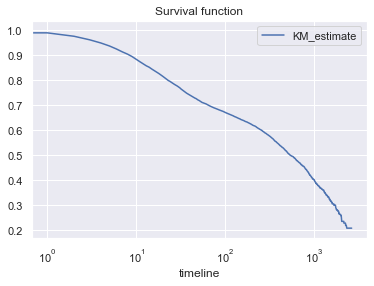

In [211]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

def survival_func(data: pd.DataFrame, id: list):
    df = data.copy()[["TimeGenerated", "EventID"]]
    df['TimeGenerated'] = pd.to_datetime(df['TimeGenerated'])
    df = df.drop_duplicates().sort_values('TimeGenerated')
    df['TimeGenerated'] = (df['TimeGenerated'] - df['TimeGenerated'].shift(periods=1)).dt.total_seconds()
    df = df.iloc[1:].reset_index(drop=True)
    df.EventID = df.EventID.isin(id)
    print(sum(df.EventID))

    kmf = KaplanMeierFitter()
    kmf.fit(df['TimeGenerated'], event_observed=df.EventID)
    kmf.survival_function_.plot(logx=True)
    plt.title('Survival function');
    
survival_func(df, [17, 19, 10010, 10016, 10021, 1033, 41, 51, 153])

In [171]:
df[(df["EventID"] == 17)]

EventID           ComputerName                     SourceName  \
0           17  Sultan.mlab.cs.msu.su  Microsoft-Windows-WHEA-Logger   
1           17  Sultan.mlab.cs.msu.su  Microsoft-Windows-WHEA-Logger   
2           17  Sultan.mlab.cs.msu.su  Microsoft-Windows-WHEA-Logger   
4           17  Sultan.mlab.cs.msu.su  Microsoft-Windows-WHEA-Logger   
5           17  Sultan.mlab.cs.msu.su  Microsoft-Windows-WHEA-Logger   
...        ...                    ...                            ...   
32269       17  Sultan.mlab.cs.msu.su  Microsoft-Windows-WHEA-Logger   
32278       17  Sultan.mlab.cs.msu.su  Microsoft-Windows-WHEA-Logger   
32300       17  Sultan.mlab.cs.msu.su  Microsoft-Windows-WHEA-Logger   
32307       17  Sultan.mlab.cs.msu.su  Microsoft-Windows-WHEA-Logger   
32308       17  Sultan.mlab.cs.msu.su  Microsoft-Windows-WHEA-Logger   

                  TimeGenerated  EventCategory  EventType  \
0      Sat Aug 31 10:21:56 2024              0          2   
1      Sat Aug 31 10:22:00 2024              0          2   
2      Sat Aug 31 10:22:04 2024              0          2   
4      Sat Aug 31 10:23:28 2024              0          2   
5      Sat Aug 31 10:24:03 2024              0          2   
...                         ...            ...        ...   
32269  Wed Oct 16 16:27:34 2024              0          2   
32278  Wed Oct 16 17:14:20 2024              0          2   
32300  Wed Oct 16 18:00:20 2024              0          2   
32307  Wed Oct 16 18:34:14 2024              0          2   
32308  Wed Oct 16 18:40:06 2024              0          2   

                                               EventData  
0      ('4', '{00000000-0000-0000-0000-000000000000}'...  
1      ('4', '{00000000-0000-0000-0000-000000000000}'...  
2      ('4', '{00000000-0000-0000-0000-000000000000}'...  
4      ('4', '{00000000-0000-0000-0000-000000000000}'...  
5      ('4', '{00000000-0000-0000-0000-000000000000}'...  
...                                                  ...  
32269  ('4', '{00000000-0000-0000-0000-000000000000}'...  
32278  ('4', '{00000000-0000-0000-0000-000000000000}'...  
32300  ('4', '{00000000-0000-0000-0000-000000000000}'...  
32307  ('4', '{00000000-0000-0000-0000-000000000000}'...  
32308  ('4', '{00000000-0000-0000-0000-000000000000}'...  

[7846 rows x 7 columns]

In [156]:
time_interval[time_interval > 1000]

1       1374.0
3       1842.0
4       1159.0
5       1207.0
6       1553.0
         ...  
4847    3457.0
4855    3079.0
4860    1452.0
4865    2512.0
4870    1043.0
Name: TimeGenerated, Length: 1535, dtype: float64

In [157]:
time_interval[time_interval < 0]

Series([], Name: TimeGenerated, dtype: float64)

<Axes: xlabel='TimeGenerated', ylabel='Density'>

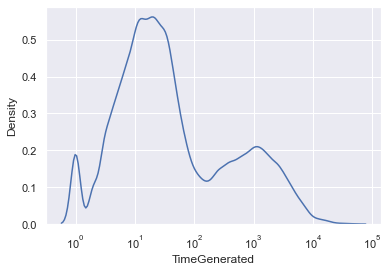

In [167]:
a = df[(df["EventID"] == 17) & (df["EventType"] == 2)]["TimeGenerated"]
a = pd.to_datetime(a).sort_values()
time_interval1 = (a.iloc[1:].reset_index(drop=True) - a.iloc[:-1].reset_index(drop=True)).dt.total_seconds()
# time_interval = time_interval[time_interval < 1000]
sns.kdeplot(time_interval1 + 1, log_scale=True, bw_adjust=0.5)

<Axes: xlabel='TimeGenerated', ylabel='Density'>

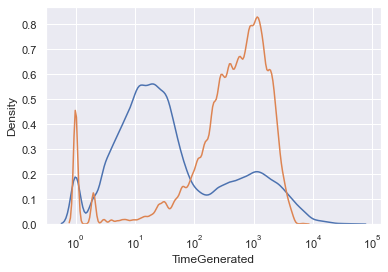

In [170]:
a = df[(df["EventID"] != 17) & (df["EventType"] == 1)]["TimeGenerated"]
a = pd.to_datetime(a).sort_values()
time_interval2 = (a.iloc[1:].reset_index(drop=True) - a.iloc[:-1].reset_index(drop=True)).dt.total_seconds()
# time_interval = time_interval[time_interval < 1000]
sns.kdeplot(time_interval1 + 1, log_scale=True, bw_adjust=0.5)
sns.kdeplot(time_interval2 + 1, log_scale=True, bw_adjust=0.25)

<Axes: xlabel='TimeGenerated', ylabel='Density'>

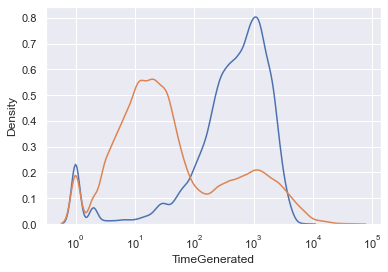

In [166]:
a = df[(df["EventType"] == 1)]["TimeGenerated"]
a = pd.to_datetime(a).sort_values()
time_interval = (a.iloc[1:].reset_index(drop=True) - a.iloc[:-1].reset_index(drop=True)).dt.total_seconds()
# time_interval = time_interval[time_interval < 1000]
sns.kdeplot(time_interval + 1, log_scale=True, bw_adjust=0.5)
sns.kdeplot(time_interval1 + 1, log_scale=True, bw_adjust=0.5)

In [72]:
df[(df["EventID"] == 17) & (df["EventType"] == 2)]["TimeGenerated"].hist()

<Axes: >

Error in callback <function flush_figures at 0x0000023D0420E830> (for post_execute):



KeyboardInterrupt



In [63]:
df[(df["EventID"] == -1073479673) & (df["EventType"] < 3)]["TimeGenerated"].hist()

<Axes: >

Error in callback <function flush_figures at 0x0000023D0420E830> (for post_execute):



KeyboardInterrupt



In [62]:
df[df["EventType"].isin([1, 2])]["EventID"].value_counts()

EventID
-1073479673    16718
 1006           5807
 36888          2414
 36874          1820
-1073086414     1386
-1073086408     1025
 36887           991
-1073740757      458
 1129            235
-1073734824      134
-1073734786       88
 1111             68
 5719             31
 1014             25
-1073734815       24
-1073736663       22
-1073734798       22
 468906           22
 1055             22
-1073734793       15
 20               10
-1610350565       10
 129               8
 36                7
 131               6
 24                6
-1073731814        6
-1073734802        5
-2147477640        3
-2147482572        3
-1073734781        3
-1073734813        3
-2147221375        1
 17                1
-1073734801        1
 16                1
 50                1
-2147478627        1
-2147478591        1
-1073736765        1
Name: count, dtype: int64

In [3]:
X, y, features, categ, sch_nan = ds.load_pbc_dataset()
bins = cnt.get_bins(time=y["time"], cens=y["cens"])

In [4]:
# X["trt"] = "1"
X["trt"] = X["trt"].apply(lambda x: str(x) + "_trt" if x == x else x)

In [9]:
X["spiders"] = X["spiders"].apply(lambda x: str(x) + "_s" if x == x else x)

[ 43 162 158   2  10 225 227 229  21 241 250 209 235 190 228 249 251 237
 170 247 233 157  79 248 246 245 203  32 236 182 239 217 242 243 224 238
   7 161 178  12 234 232 231 230 226 205 202 214 172 164 154 215 216 213
  15 129 212 211 195 184 206 207 204 197 201 196 174 198 194 193 192   5
 188 163  99 183 185 130  63 179 169 151 177 175 173 171 168 145 165 102
 164  30 160 156 155 104 152 149 133 132 147 140 143 141 142  49 138 139
 137  67 123 128  42 124 117 120 119 112 118  93 113 105 114 105  80  98
 100  92  78  96  90  88  89  85   0  45  86  84  66  80  34  33  73  71
  72  70  65  58  41  36  31  28 240 223 189 131 200 111   0 159  61 127
 221 218 252  68 244 135  94 116   3  27  97  13 222 176 150  29 219 220
   4 210  19 208 199  16 186 187 191  20  25 181 180  40 153 106 168 167
 166  26  18 148 146  11 122   9 144   1  62  52  14 136 134 125  77  95
 126  60  17 115 121   8  44 108 107 110 109 101 103  87  91  82   6  81
  75  76  74  83  69  64  35  37  57  51  59  24  5

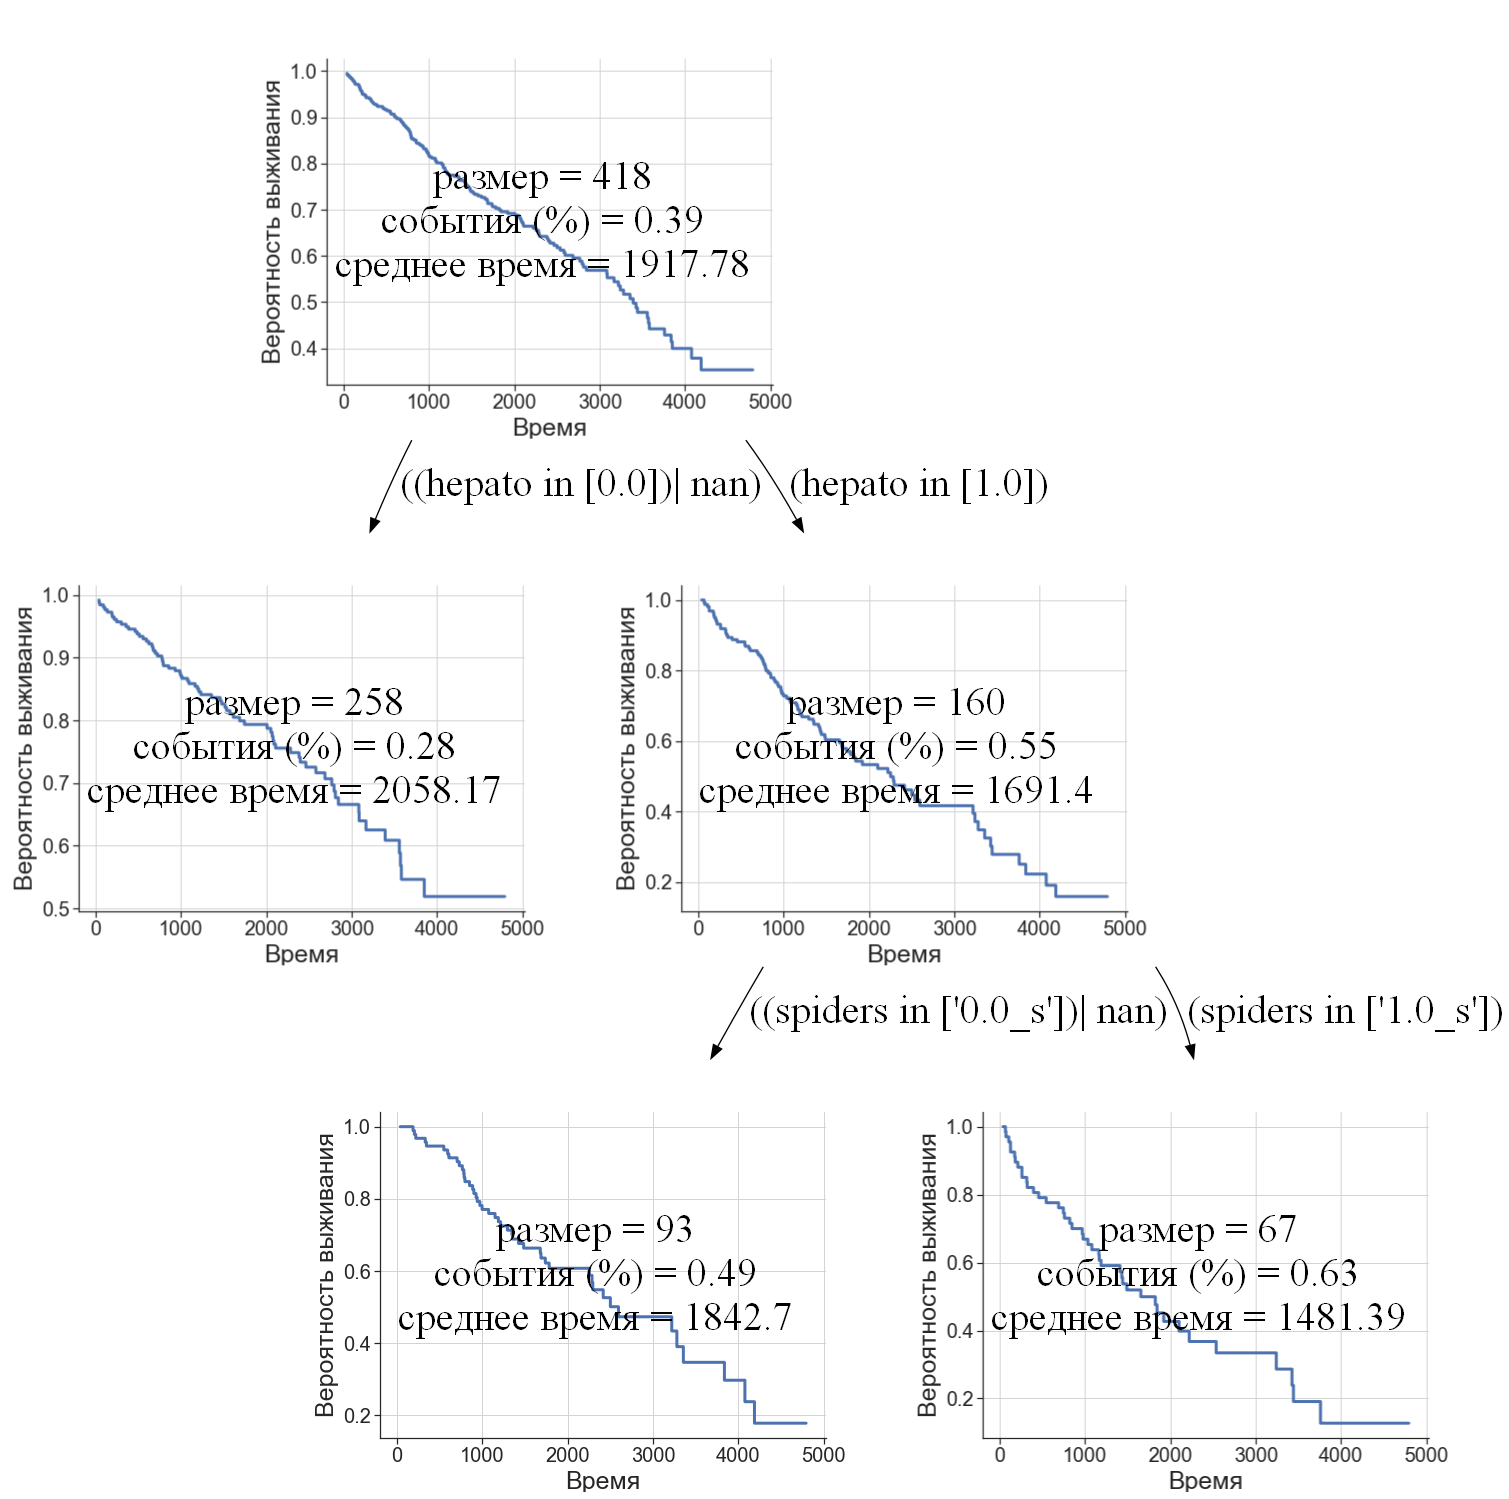

In [10]:
from survivors.tree import CRAID

# Создание дерева выживаемости
cr = CRAID(criterion='logrank', depth=2, min_samples_leaf=0.1, signif=0.05,
           categ=categ, leaf_model="base", features=categ)

# Обучение дерева
cr.fit(X, y)

# Прогноз функции выживания для всех наблюдений выборки X
sf_cr = cr.predict_at_times(X, bins=bins, mode="surv")
chf_cr = cr.predict_at_times(X, bins=bins, mode="hazard")

# Визуализация структуры дерева
cr.visualize(target=cnt.TIME_NAME, mode="surv", lang="ru")

In [11]:
sf_cr

array([[1.        , 1.        , 1.        , ..., 0.12733949, 0.12733949,
        0.12733949],
       [1.        , 1.        , 1.        , ..., 0.12733949, 0.12733949,
        0.12733949],
       [0.99224806, 0.99224806, 0.98837209, ..., 0.51907621, 0.51907621,
        0.51907621],
       ...,
       [0.99224806, 0.99224806, 0.98837209, ..., 0.51907621, 0.51907621,
        0.51907621],
       [0.99224806, 0.99224806, 0.98837209, ..., 0.51907621, 0.51907621,
        0.51907621],
       [0.99224806, 0.99224806, 0.98837209, ..., 0.51907621, 0.51907621,
        0.51907621]])

[ 43 162 158   2  10 225 227 229  21 241 250 209 235 190 228 249 251 237
 170 247 233 157  79 248 246 245 203  32 236 182 239 217 242 243 224 238
   7 161 178  12 234 232 231 230 226 205 202 214 172 164 154 215 216 213
  15 129 212 211 195 184 206 207 204 197 201 196 174 198 194 193 192   5
 188 163  99 183 185 130  63 179 169 151 177 175 173 171 168 145 165 102
 164  30 160 156 155 104 152 149 133 132 147 140 143 141 142  49 138 139
 137  67 123 128  42 124 117 120 119 112 118  93 113 105 114 105  80  98
 100  92  78  96  90  88  89  85   0  45  86  84  66  80  34  33  73  71
  72  70  65  58  41  36  31  28 240 223 189 131 200 111   0 159  61 127
 221 218 252  68 244 135  94 116   3  27  97  13 222 176 150  29 219 220
   4 210  19 208 199  16 186 187 191  20  25 181 180  40 153 106 168 167
 166  26  18 148 146  11 122   9 144   1  62  52  14 136 134 125  77  95
 126  60  17 115 121   8  44 108 107 110 109 101 103  87  91  82   6  81
  75  76  74  83  69  64  35  37  57  51  59  24  5

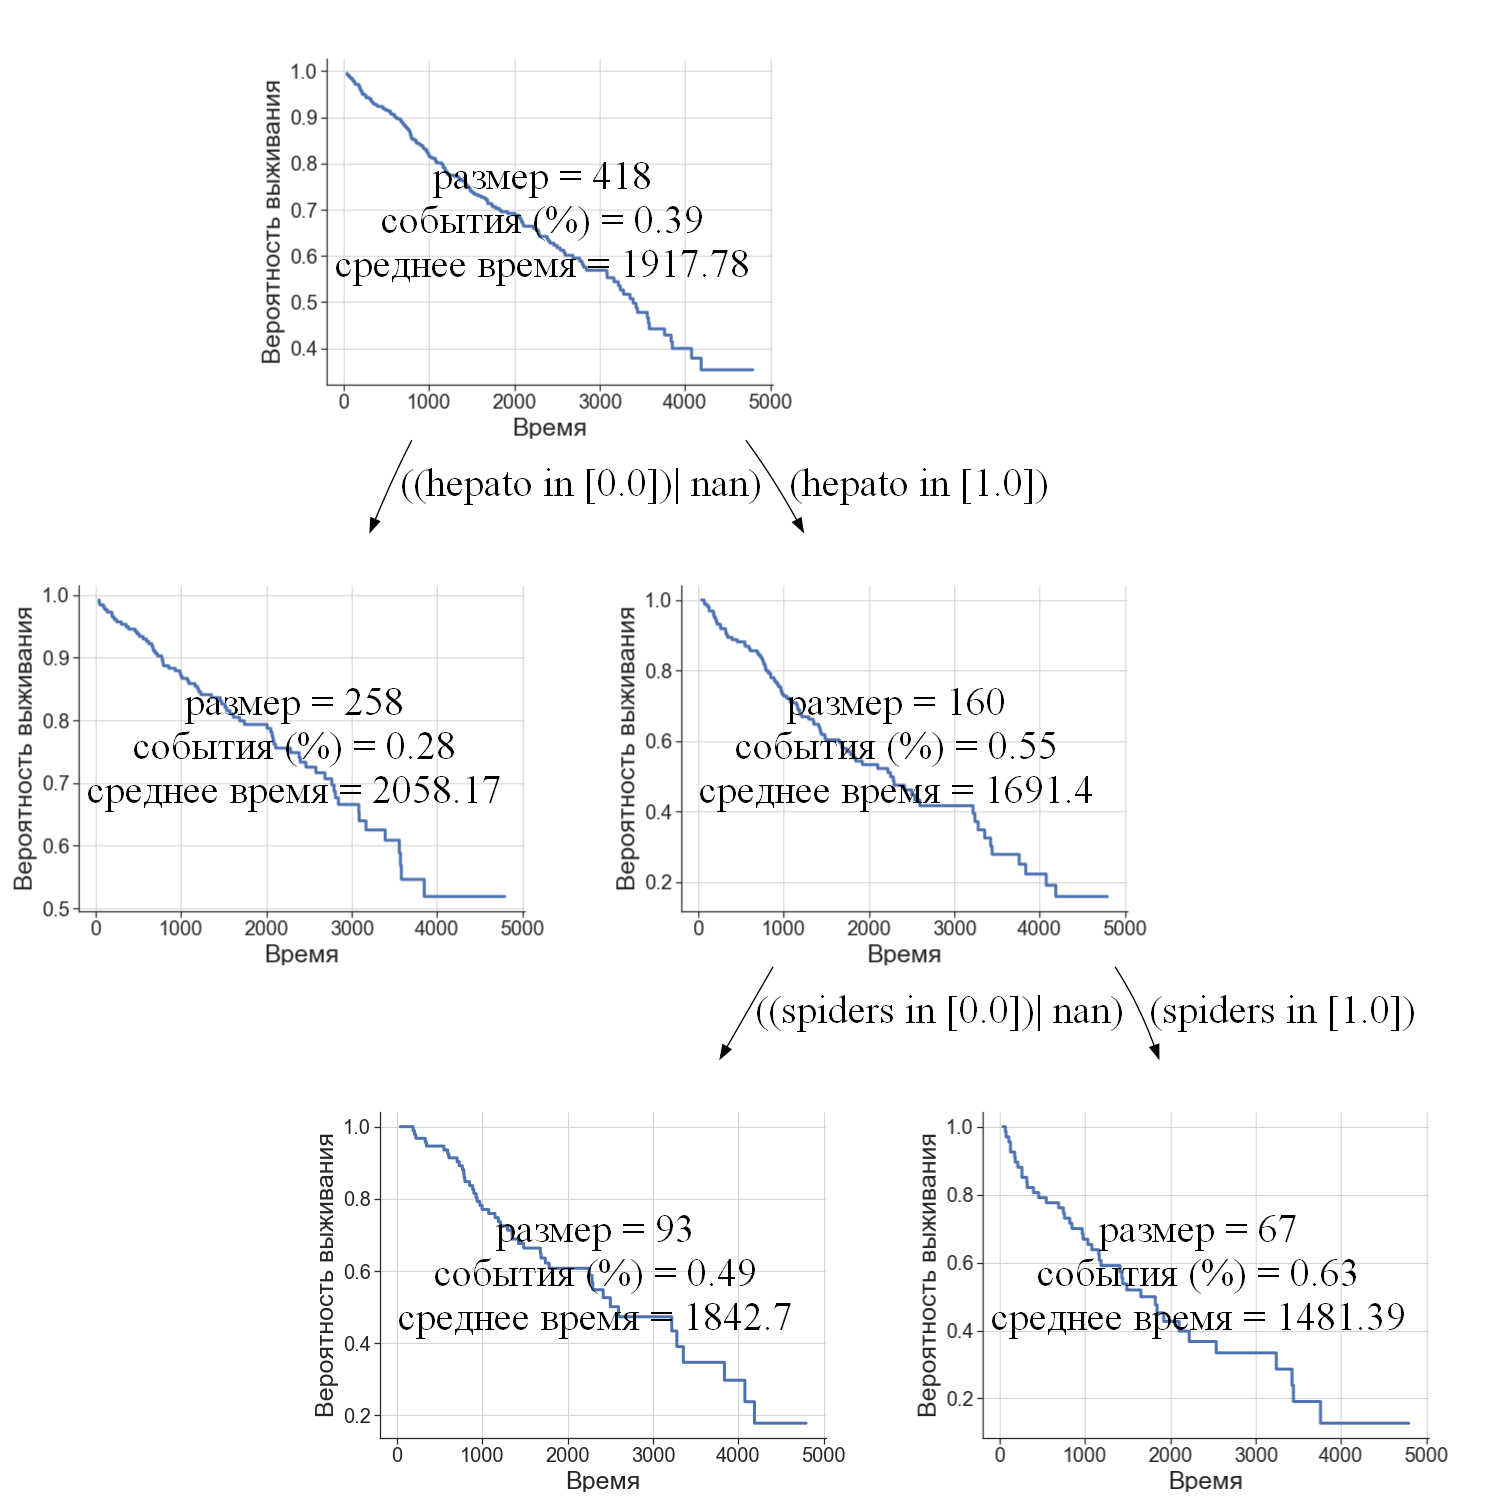

In [5]:
from survivors.tree import CRAID

# Создание дерева выживаемости
cr = CRAID(criterion='logrank', depth=2, min_samples_leaf=0.1, signif=0.05,
           categ=categ, leaf_model="base", features=categ)

# Обучение дерева
cr.fit(X, y)

# Прогноз функции выживания для всех наблюдений выборки X
sf_cr = cr.predict_at_times(X, bins=bins, mode="surv")
chf_cr = cr.predict_at_times(X, bins=bins, mode="hazard")

# Визуализация структуры дерева
cr.visualize(target=cnt.TIME_NAME, mode="surv", lang="ru")

In [6]:
sf_cr

array([[1.        , 1.        , 1.        , ..., 0.12733949, 0.12733949,
        0.12733949],
       [1.        , 1.        , 1.        , ..., 0.12733949, 0.12733949,
        0.12733949],
       [0.99224806, 0.99224806, 0.98837209, ..., 0.51907621, 0.51907621,
        0.51907621],
       ...,
       [0.99224806, 0.99224806, 0.98837209, ..., 0.51907621, 0.51907621,
        0.51907621],
       [0.99224806, 0.99224806, 0.98837209, ..., 0.51907621, 0.51907621,
        0.51907621],
       [0.99224806, 0.99224806, 0.98837209, ..., 0.51907621, 0.51907621,
        0.51907621]])

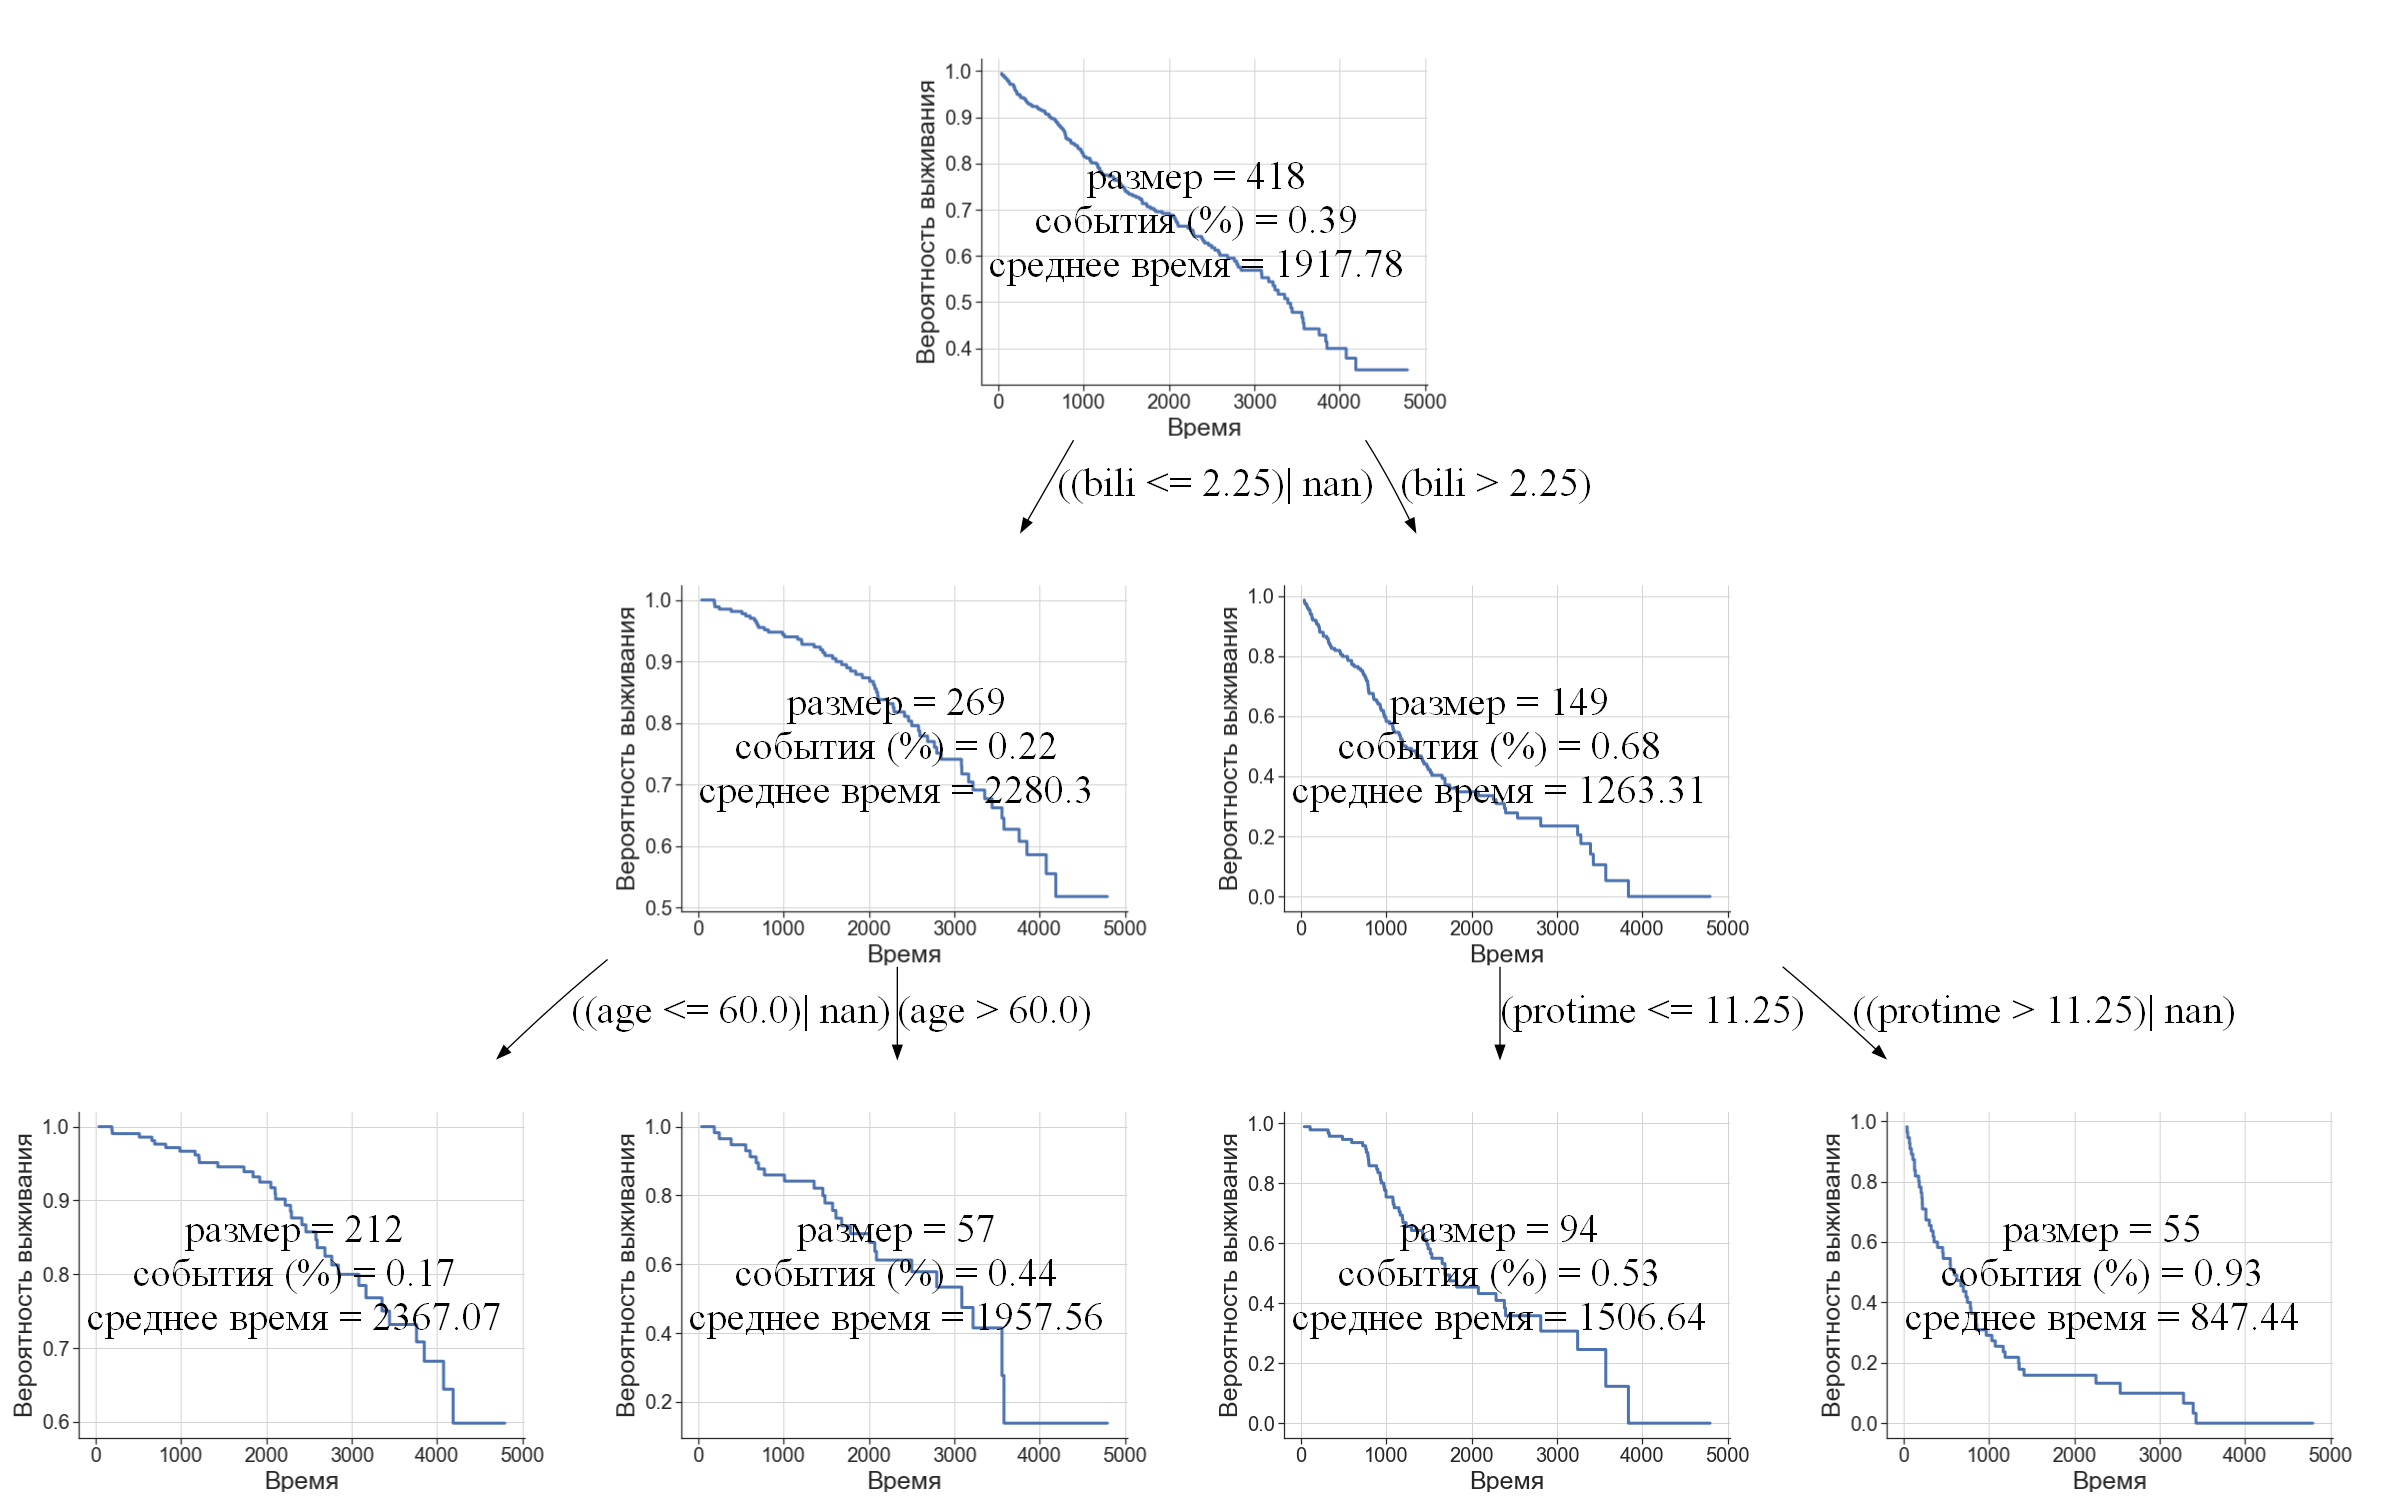

In [11]:
from survivors.tree import CRAID

# Создание дерева выживаемости
cr = CRAID(criterion='logrank', depth=2, min_samples_leaf=0.1, signif=0.05,
           categ=categ, leaf_model="base")

# Обучение дерева
cr.fit(X, y)

# Прогноз функции выживания для всех наблюдений выборки X
sf_cr = cr.predict_at_times(X, bins=bins, mode="surv")
chf_cr = cr.predict_at_times(X, bins=bins, mode="hazard")

# Визуализация структуры дерева
cr.visualize(target=cnt.TIME_NAME, mode="surv", lang="ru")

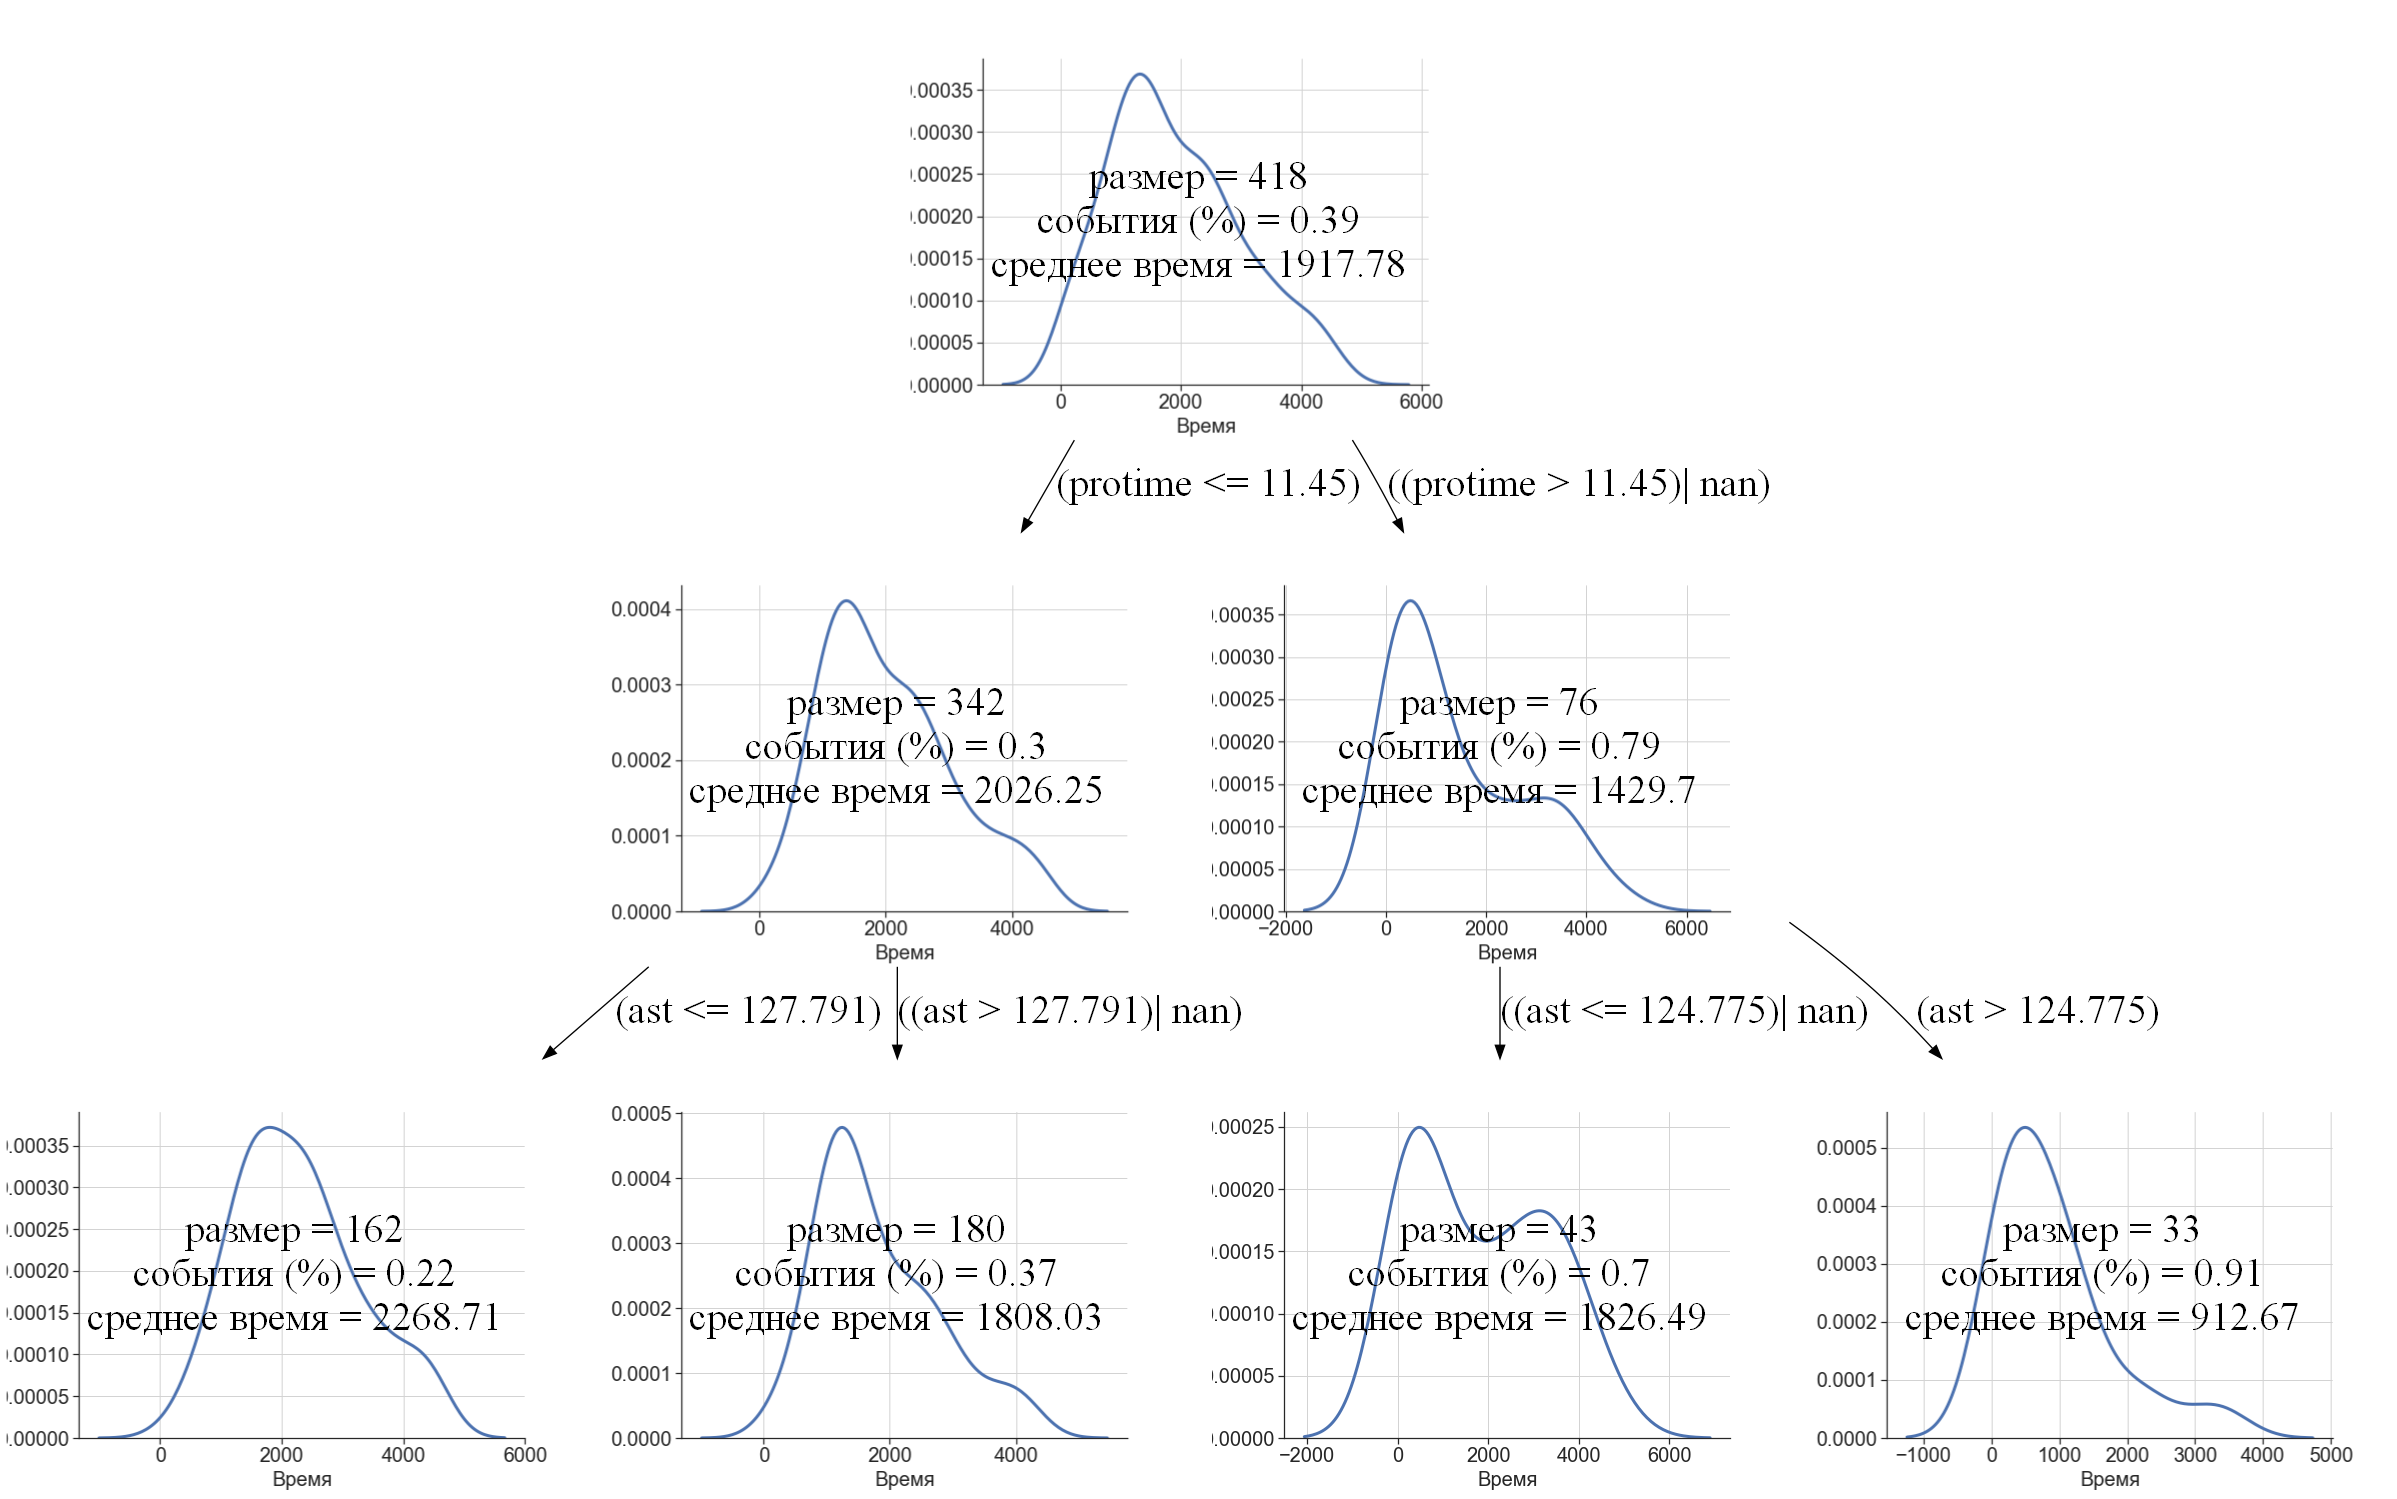

In [10]:
from survivors.tree import CRAID

p = {'balance': None, 'categ': categ, 'criterion': 'logrank', 'cut': False, 'depth': 2, 
     'leaf_model': 'base', 'min_samples_leaf': 0.05, 'signif': 1, 'woe': True}

tree = CRAID(**p)
tree.fit(X[["protime", "ast"]], y)

dot = tree.visualize(mode="kde", target="time", lang="ru")
dot

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['sex'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:797: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:990: ConvergenceWarning: Your dataset has more variables than samples. Even with a penalizer (which you must use), convergence is not guaranteed.

  warnings.warn(warning_text, ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1163: ConvergenceWarning: Column sex has high sample correlation with the duration column.

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['sex'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:797: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:990: ConvergenceWarning: Your dataset has more variables than samples. Even with a penalizer (which you must use), convergence is not guaranteed.

  warnings.warn(warning_text, ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1163: ConvergenceWarning: Column stage has high sample correlation with the duration colum

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:797: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:990: ConvergenceWarning: Your dataset has more variables than samples. Even with a penalizer (which you must use), convergence is not guaranteed.

  warnings.warn(warning_text, ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1163: ConvergenceWarning: Column stage has high sample correlation with the duration column. This may harm convergence. This could be a form of 'complete separation'.     See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1163: ConvergenceWarning: Column sex has hi

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['ascites'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:797: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['edema', 'ascites'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\life

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['sex', 'edema', 'ascites', 'spiders'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:797: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:990: ConvergenceWarning: Your dataset has more variables than samples. Even with a penalizer (which you must use), convergence is not guaranteed.

  warnings.warn(warning_text, ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1120: ConvergenceWarning: Column hepato have very low varia

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['edema'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:797: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1120: ConvergenceWarning: Column ascites have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['cens'].astype(bool)
>>> print(df.loc[events, 'ascites'].var())
>>> print(df.loc[~events, 'ascites'].var())

A very low variance 

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['ascites'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:797: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['ascites'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\uti

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['edema'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:797: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1120: ConvergenceWarning: Column ascites have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['cens'].astype(bool)
>>> print(df.loc[events, 'ascites'].var())
>>> print(df.loc[~events, 'ascites'].var())

A very low variance 

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['sex', 'edema', 'ascites', 'spiders'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:797: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:990: ConvergenceWarning: Your dataset has more variables than samples. Even with a penalizer (which you must use), convergence is not guaranteed.

  warnings.warn(warning_text, ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1163: ConvergenceWarning: Column sex has high sample correl

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['ascites'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:797: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:990: ConvergenceWarning: Your dataset has more variables than samples. Even with a penalizer (which you must use), convergence is not guaranteed.

  warnings.warn(warning_text, ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1120: ConvergenceWarning: Column edema have very low variance when conditioned on deat

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:797: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:990: ConvergenceWarning: Your dataset has more variables than samples. Even with a penalizer (which you must use), convergence is not guaranteed.

  warnings.warn(warning_text, ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1163: ConvergenceWarning: Column stage has high sample correlation with the duration column. This may harm convergence. This could be a form of 'complete separation'.     See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1163: ConvergenceWarning: Column sex has hi

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:797: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:990: ConvergenceWarning: Your dataset has more variables than samples. Even with a penalizer (which you must use), convergence is not guaranteed.

  warnings.warn(warning_text, ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1163: ConvergenceWarning: Column sex has high sample correlation with the duration column. This may harm convergence. This could be a form of 'complete separation'.     See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1163: ConvergenceWarning: Column edema has hi

C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1100: ConvergenceWarning: Column(s) ['sex', 'ascites'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:797: RuntimeWarning: invalid value encountered in divide
  return (X - mean) / std
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:990: ConvergenceWarning: Your dataset has more variables than samples. Even with a penalizer (which you must use), convergence is not guaranteed.

  warnings.warn(warning_text, ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\survive\lib\site-packages\lifelines\utils\__init__.py:1120: ConvergenceWarning: Column edema have very low variance when conditioned 

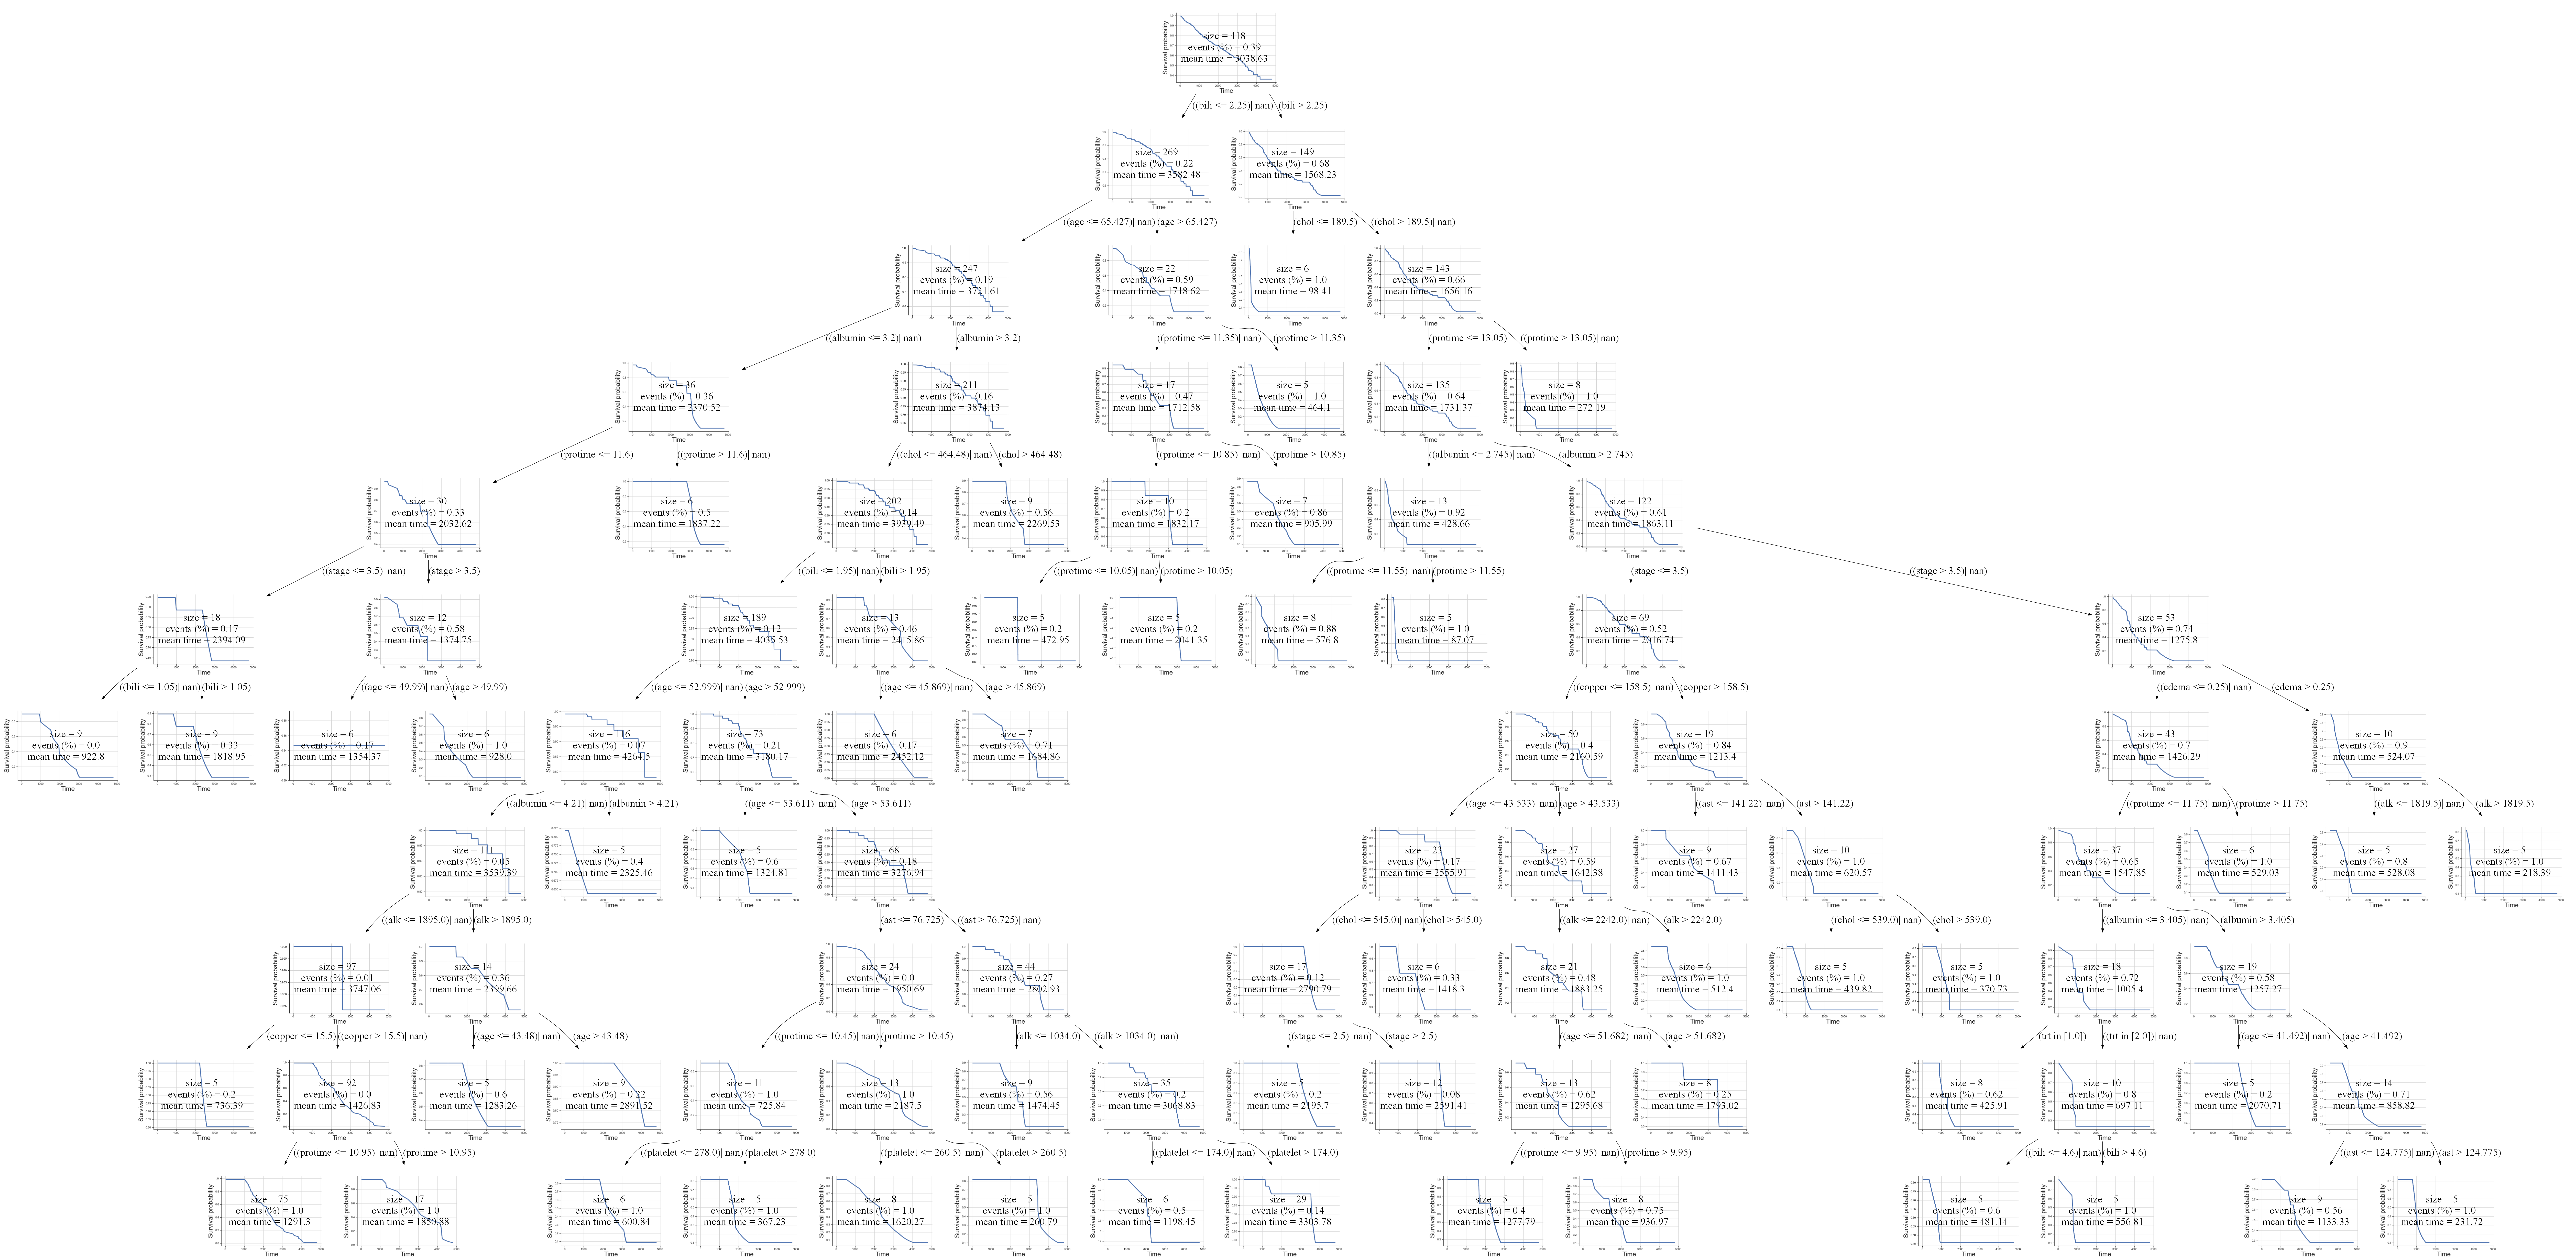

In [10]:
from survivors.tree import CRAID

# Создание дерева выживаемости
cr = CRAID(criterion='logrank', depth=10, min_samples_leaf=0.01, signif=0.2,
           categ=categ, leaf_model="CoxPH", leaf_penalizer=10, leaf_except_stop=False)

# Обучение дерева
cr.fit(X, y)

# Прогноз функции выживания для всех наблюдений выборки X
sf_cr = cr.predict_at_times(X, bins=bins, mode="surv")
chf_cr = cr.predict_at_times(X, bins=bins, mode="hazard")

# Визуализация структуры дерева
cr.visualize(target=cnt.TIME_NAME, mode="surv")

In [11]:
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter, CoxPHFitter

X_ = X.copy()
X_[cnt.TIME_NAME] = y[cnt.TIME_NAME]
X_[cnt.CENS_NAME] = y[cnt.CENS_NAME]
X_ = X_.fillna(0).replace(np.nan, 0)

In [15]:
from survivors.external import WeibullAFT

w = WeibullAFT()
w.fit(X_)
w.predict_feature(X=None, feature_name=cnt.CENS_NAME)

array([0.38516746])

In [16]:
round(w.predict_feature(X=None, feature_name=cnt.CENS_NAME)[0], 2)

0.39

In [26]:
w = CoxPHFitter()
w.fit(X_, cnt.TIME_NAME, event_col=cnt.CENS_NAME, step_size=0.2)

TypeError: CoxPHFitter.fit() got an unexpected keyword argument 'step_size'

In [18]:
w.predict_cumulative_hazard(w._central_values, times=bins)

baseline
41.0    0.000705
42.0    0.000731
43.0    0.000757
44.0    0.000783
45.0    0.000809
...          ...
4187.0  0.670501
4188.0  0.670739
4189.0  0.670976
4190.0  0.671213
4191.0  0.671451

[4151 rows x 1 columns]

In [19]:
t = w.predict_survival_function(w._central_values, times=bins).to_numpy().T

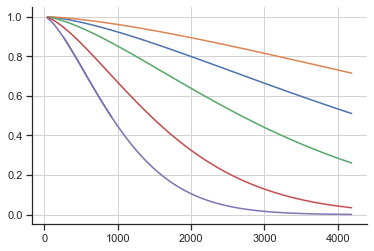

In [24]:
import matplotlib.pyplot as plt

plt.step(bins, t[0])
plt.step(bins, t[0]**0.5)
plt.step(bins, t[0]**2)
plt.step(bins, t[0]**5)
plt.step(bins, t[0]**10)

In [18]:
w.__dict__

{'alpha': 0.05,
 '_class_name': 'WeibullAFTFitter',
 '_label': None,
 '_censoring_type': <CensoringType.RIGHT: 'right'>,
 'penalizer': 0.0,
 'l1_ratio': 0.0,
 '_fitted_parameter_names': ['lambda_', 'rho_'],
 'fit_intercept': True,
 'model_ancillary': False,
 'duration_col': 'time',
 'event_col': 'cens',
 'entry_col': None,
 'weights_col': None,
 'durations': 0       400.0
 1      4500.0
 2      1012.0
 3      1925.0
 4      1504.0
         ...  
 413     681.0
 414    1103.0
 415    1055.0
 416     691.0
 417     976.0
 Name: time, Length: 418, dtype: float64,
 '_time_fit_was_called': '2024-02-21 07:05:20 UTC',
 '_n_examples': 418,
 'robust': False,
 'timeline': array([  41.,   43.,   51.,   71.,   77.,   94.,  110.,  111.,  130.,
         131.,  140.,  179.,  186.,  191.,  193.,  198.,  207.,  216.,
         221.,  223.,  249.,  264.,  304.,  321.,  326.,  334.,  348.,
         359.,  388.,  400.,  460.,  466.,  489.,  515.,  533.,  549.,
         552.,  559.,  597.,  611.,  617.,  62

In [8]:
chf_cr.shape

(418, 4151)

In [8]:
print(cr.predict(X, target=cnt.TIME_NAME)[0])
print(cr.predict(X, target=cnt.CENS_NAME)[0])
print(cr.predict(X, target="depth")[0])

847.4363403320312
0.9272727272727272
2.0


In [30]:
print(cr.predict(X, target=cnt.TIME_NAME)[0])
print(cr.predict(X, target=cnt.CENS_NAME)[0])
print(cr.predict(X, target="depth")[0])

90.067364095508
1.0
5.0


In [32]:
y[0]

(True, 400.)

In [31]:
pred_time = cr.predict(X, target=cnt.TIME_NAME)
print(pred_time[0])
pred_prob = cr.predict(X, target=cnt.CENS_NAME)
print(pred_prob[0])
pred_depth = cr.predict(X, target="depth")
print(pred_depth[0])
# pred_size = cr.predict(X, target="size")

# for f in features:
#     pred = cr.predict(X, target=f)
#     print(f, pred[0], X.iloc[0][f])

90.067364095508
1.0
5.0


### Построение ансамблей деревьев выживаемости

In [77]:
from survivors.ensemble import BootstrapCRAID

# Создание дерева выживаемости
bstr = BootstrapCRAID(n_estimators=10, size_sample=0.7, max_features=0.3, 
                      criterion='peto', depth=3, min_samples_leaf=0.01, categ=categ, leaf_model="base")

# Обучение дерева
bstr.fit(X, y)

# Прогноз функции выживания для всех наблюдений выборки X
sf_bstr = bstr.predict_at_times(X, bins=bins, mode="surv")

fitted: 10 models.


In [78]:
from survivors.ensemble import BoostingCRAID

# Создание дерева выживаемости
boost = BoostingCRAID(mode_wei='linear', n_estimators=10, size_sample=0.5, 
                      ens_metric_name='IBS_REMAIN', max_features=0.3, criterion='peto', depth=3,
                      min_samples_leaf=0.01, categ=categ, leaf_model="base")

# Обучение дерева
boost.fit(X, y)

# Прогноз функции выживания для всех наблюдений выборки X
sf_boost = boost.predict_at_times(X, bins=bins, mode="surv")

fitted: 10 models.


### Оценка качества прогнозов

In [82]:
m = metr.ibs_remain
for p in [sf_cr, sf_bstr, sf_boost]:
    mean_ibs = m(y, y, p, bins, axis=-1)
    print(mean_ibs.round(4))  # 0.071
ibs_by_obs = m(y, y, sf_bstr, bins, axis=0)
print(ibs_by_obs[:2].round(4), ibs_by_obs[-2:].round(4))  # [0.0138, 0.038, ..., 0.0000, 0.0007]
ibs_by_time = m(y, y, sf_bstr, bins, axis=1)
print(ibs_by_time[:2].round(4), ibs_by_time[-2:].round(4))   # [0.0047, 0.0037, ..., 0.0983, 0.3533]

0.1219
0.116
0.11
[0.0237 0.0379] [0.     0.0008]
[0.     0.0042] [0.1006 0.0857]


In [80]:
ibs_by_obs[:2].round(4)

array([0.0426, 0.0655])

In [74]:
ibs_by_time.shape

(4151,)

In [75]:
import seaborn as sns
custom_params = {"axes.spines.right": False, 'grid.color': 'lightgray', 'axes.grid': True, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

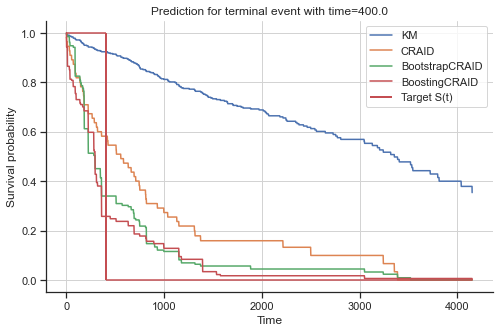

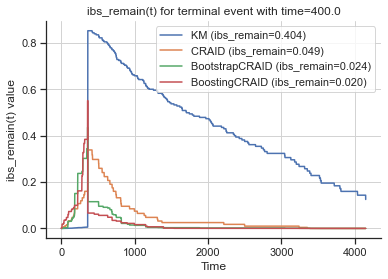

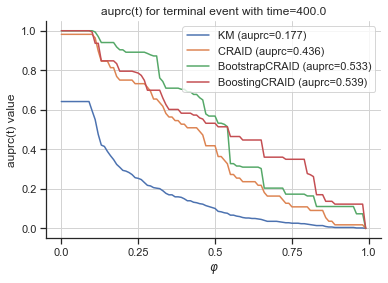

In [81]:
ind = 0

vis.plot_func_comparison(y[ind],
                     [sf_km, sf_cr[ind], sf_bstr[ind], sf_boost[ind]], 
                     ["KM", "CRAID", "BootstrapCRAID", "BoostingCRAID"])

vis.plot_metric_comparison(y[ind], 
                           [sf_km, sf_cr[ind], sf_bstr[ind], sf_boost[ind]], 
                           ["KM", "CRAID", "BootstrapCRAID", "BoostingCRAID"], bins, metr.ibs_remain)
vis.plot_metric_comparison(y[ind], 
                           [sf_km, sf_cr[ind], sf_bstr[ind], sf_boost[ind]], 
                           ["KM", "CRAID", "BootstrapCRAID", "BoostingCRAID"], bins, metr.auprc)